## Wine Grouping

We would be using an unlabeled dataset of the properties of wine in this Analysis for Unsupervised learning

`K means clustering` and `Agglomerative clustering` would be used to group similar observations in the data

In [4]:
import os
import pandas as pd

In [5]:
os.chdir('../PROJECT')

In [6]:
data = pd.read_csv('data/wine-clustering.csv')

In [7]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

The dataset contains the following properties
- Alcohol
- Malic Acid
- Ash
- Ash Alcanity
- Magnesium
- Total Phenols
- Flavanoids
- Non Flavanoid Phenols
- Proanthocyanics
- Color Intensity
- Hue
- OD280
- Proline


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [9]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [10]:
data.shape

(178, 13)

Selecting two columns to perform the K means Clustering on. Those two columns would be the X value. 

In [11]:
from sklearn.preprocessing import StandardScaler

X = data[['Alcohol','Color_Intensity']]

The columns selected from the dataset would be standardized using `standard scaler`

In [12]:
scale = StandardScaler()
X_scaled = scale.fit_transform(X)

In [13]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)
y_pred = kmeans.predict(X_scaled)




In [14]:
import numpy as np

unique,counts =np.unique(y_pred,return_counts=True)

np.asarray((unique,counts)).T

array([[ 0, 33],
       [ 1, 70],
       [ 2, 75]], dtype=int64)

Silhouette score would be used to evaluate the decision boundary of the clusters. The score varies from -1 to 1; 1 means that the cluster is well separated from other clusters.

In [28]:
from sklearn import metrics
score = metrics.silhouette_score(X, y_pred)
score

0.4510900084311691

Our score is __0.45__, which is close to the middle of the scoring metric.

Different values of clusters would be used to evaluate and assess the optimum number of clusters that should be used.

Text(0, 0.5, 'Inertia')

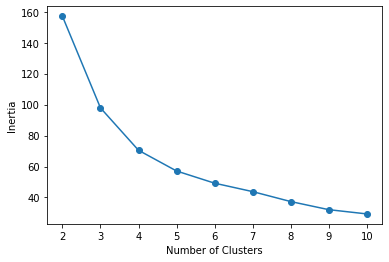

In [16]:
import matplotlib.pyplot as plt

inertia = []
sil_score = []
list_clusters = list(range(2,11))

for num in list_clusters:
    kmeans = KMeans(n_clusters = num)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    # sil_score.append(metrics.silhouette_score(X,y_pred))


plt.plot(list_clusters,inertia)
plt.scatter(list_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')


According to the plot, judging by the elbow method, we can assume that 4 clusters is the optimal number to choose

In [17]:
sil_score = []

for num in list_clusters:
    km = KMeans(n_clusters = num)
    km.fit(X_scaled)
    y_pred = km.predict(X_scaled)
    score = metrics.silhouette_score(X,y_pred)
    sil_score.append({num : score})
    
sil_score

[{2: 0.41952970885608987},
 {3: 0.4510900084311691},
 {4: 0.3704482993493728},
 {5: 0.3925710792881799},
 {6: 0.25620296939665244},
 {7: 0.2583251807038345},
 {8: 0.2242497518339467},
 {9: 0.2563450536363027},
 {10: 0.21997002790338216}]

Using the Silhoutte metric , we can say that the most ideal number of clusters is 3.

In [18]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)
y_pred = kmeans.predict(X_scaled)

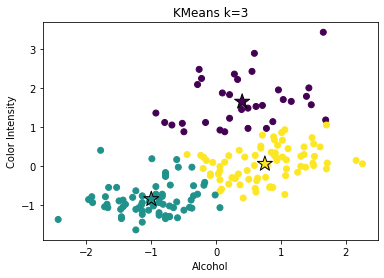

In [19]:
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=y_pred) 

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="*", s=250, c=[0,1,2], edgecolors="k") 

plt.xlabel("Alcohol")
plt.ylabel("Color Intensity")
plt.title("KMeans k=3")
plt.show() 

## Agglomerative Clustering

We would be testing Agglomerative Clustering on our dataset to assess if it is significantly better than K means.

Text(0, 0.5, 'Feature 1')

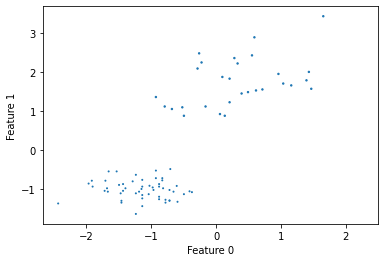

In [33]:
from sklearn.cluster import AgglomerativeClustering



agg = agg = AgglomerativeClustering(n_clusters=3)
agg_cluster = agg.fit_predict(X_scaled)


plt.scatter(X_scaled[:, 0], X_scaled[:, 1], agg_cluster)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")



In [34]:
score = metrics.silhouette_score(X, agg_cluster)

score

0.456208182632913

The `silhouette score` of the agglomerative clustering algorithm is identical to the K-means clustering algorithm.

### Conclusion

I applied the Kmeans clustering algorithm and Algomerative clustering algorithm to the dataset. According to their silhouette score, I was able to conclude that the ideal number of clusters the data set could be grouped was 3. However, Our score indicated that our data is not particularly well-suited to this type of clustering.